# Basic Relationships between different baseball statistics

As a function of season.

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# data management
import pandas as pd

#
from scipy import stats
import scipy

In [2]:
import hittingpredictor as hp

In [3]:
df = hp.scrape_year(year=2019,cat='bat',verbose=0)

In [4]:
# filter by some number of plate appearances?



In [13]:
np.array(df['PA']).astype('float')

array([nan, nan,  2., ...,  1.,  0.,  0.])

In [22]:
cleanx = np.array(df[categories[i]]).astype('float')
cleany = np.array(df[categories[j]]).astype('float')
w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
print(slope)


0.8907794784558726


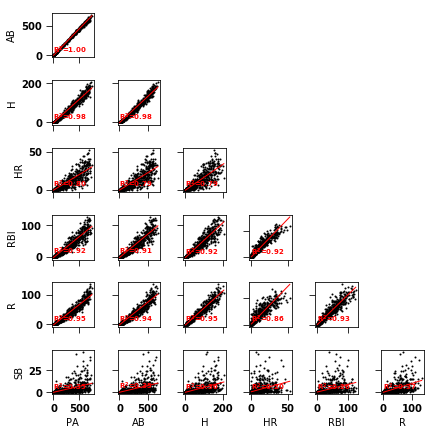

In [25]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

## Part 2: Pitching Correlations

In [27]:
import pitchingpredictor as pp

In [28]:
df = pp.scrape_year(year=2019,cat='pit',verbose=0)

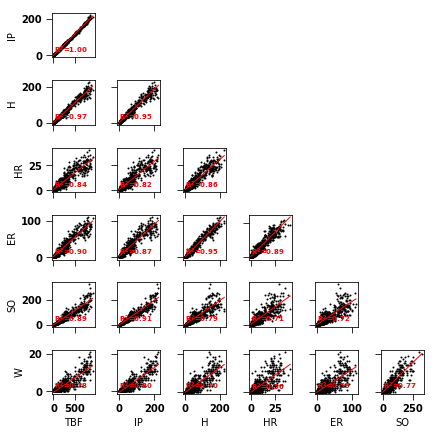

In [30]:
categories = ['TBF','IP','H','HR','ER','SO','W']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

In [22]:
df.columns

Index(['#', 'Name', 'Team', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO', 'Year'],
      dtype='object')